## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.stats.outliers_influence import variance_inflation_factor
rcParams['figure.figsize'] = (12,6)
sns.set()
import statistics
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data=pd.read_csv('/Users/Lovely_Ray/Desktop/data science/CTS/sample_sales_data.csv')
#Taking a look at the first 5 rows of the dataset
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Data Pre-processing

In [3]:
# the no of columns and rows in the data
data.shape

(7829, 10)

** so we can see that the dataset has 7829 rows and 10 columns

In [4]:
# Checking datatypes of the each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [5]:
# Dropping unnecessary column 'unnamed'
data=data.drop(['Unnamed: 0'],axis=1)

In [6]:
#statistical summary of the dataset for numerical variables
data.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [7]:
#changing 'time stamp'column type to datatime
data['timestamp']=pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [9]:
#Summary of data for categorical variables
data.describe(include='O')

,transaction_id,product_id,category,customer_type,payment_type
count,7829,7829,7829,7829,7829
unique,7829,300,22,5,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,cash
freq,1,114,998,1601,2027


In [10]:
#Extracting year from the timetsamp
data['date_year'] = data['timestamp'].dt.year

data.sample(5)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date_year
5002,3de09592-b92e-45bc-8265-93d7aa130197,2022-03-04 10:09:39,7f478817-aa5b-44e9-9059-8045228c9eb0,meat,premium,11.49,3,34.47,cash,2022
2136,2e749890-1bfb-4dbd-85cf-11b84763a283,2022-03-05 14:34:15,6880b9bc-31e4-470f-80d6-6a9088e1195a,refrigerated items,premium,8.19,2,16.38,debit card,2022
926,54d3a28c-1ce4-42ed-bbe9-2c580670bffc,2022-03-04 13:45:08,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,4.99,2,9.98,cash,2022
4957,59884788-d7b4-45ff-a1ce-80254cd9dfbc,2022-03-06 14:59:19,3b6cb6b3-cc32-43e9-9cc5-28f750eeb8cf,meat,premium,20.49,1,20.49,debit card,2022
3053,68a0f8ed-d0c4-42f4-b1e9-a303d324603a,2022-03-07 12:33:50,7cb00b7d-207a-4179-8f47-297f7f15c555,canned foods,premium,8.99,2,17.98,e-wallet,2022


In [11]:
#Extracting month from the timetsamp
data['date_month_no'] = data['timestamp'].dt.month

data.sample(5)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date_year,date_month_no
1274,01041d7f-00df-4539-9d38-611fc6a1e8f9,2022-03-03 16:52:27,6370633a-ac41-42a1-a29e-56c14d63786f,vegetables,gold,2.49,2,4.98,debit card,2022,3
1385,e430d85d-a46e-44fd-8177-5065d1b9f95d,2022-03-07 10:04:49,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,vegetables,non-member,1.49,1,1.49,cash,2022,3
2514,2cc9b7a1-05ce-4492-b866-42569237289b,2022-03-02 09:26:22,371af9e4-5eae-4b90-b842-d7e532fa9943,frozen,standard,11.49,2,22.98,credit card,2022,3
2391,535ce5f9-6ad4-4b4d-9a50-a9181abfeb8f,2022-03-05 12:08:10,9e893e11-1646-4875-bc51-de14ed52b5ac,frozen,basic,11.99,3,35.97,debit card,2022,3
6852,58898328-bfd3-428e-a7bc-9be3b71ef31d,2022-03-05 12:30:32,2d2a0893-437e-4e57-94cf-d60deef4fcb5,personal care,basic,5.49,3,16.47,credit card,2022,3


In [12]:
#Extracting day from the timetsamp
data['date_day'] = data['timestamp'].dt.day

data.sample(5)

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date_year,date_month_no,date_day
6523,6e54ee81-42d6-4f3d-8c41-06cc65c18c66,2022-03-03 14:09:00,9edd33d5-6d29-4094-ba4d-14ab68e85807,baby products,non-member,9.99,1,9.99,e-wallet,2022,3,3
2875,0976bf8f-1e2c-4f55-a235-c5ca2b80f956,2022-03-05 18:11:07,db69f72a-b98c-4f5d-9b47-1067b9da74c7,canned foods,standard,3.49,3,10.47,e-wallet,2022,3,5
3974,1a4d6d6c-4c4a-4650-a7ea-902548417891,2022-03-07 18:16:42,a1b5b743-988d-448c-b9b4-892359891331,beverages,premium,12.49,1,12.49,cash,2022,3,7
5254,198750ba-d78b-43c7-8587-a528f6df5fc9,2022-03-04 12:53:33,b4c404b8-6075-4b35-8b87-976e4ce3abd0,seafood,premium,18.19,1,18.19,cash,2022,3,4
7288,b58327e6-d3a7-4ba7-9019-cd2044d7290d,2022-03-04 19:34:52,19ab62ef-c7aa-4035-a0fc-7c7d64721cda,kitchen,premium,18.19,4,72.76,cash,2022,3,4


## EDA

In [13]:
data.shape

(7829, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
 9   date_year       7829 non-null   int64         
 10  date_month_no   7829 non-null   int64         
 11  date_day        7829 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 734.1+ KB


In [15]:
##Finding missing values in the dataset
data.isna().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
date_year         0
date_month_no     0
date_day          0
dtype: int64

** We don't have any missing values in the dataset

In [16]:
# Find Duplicate Values
data.duplicated().sum()

0

** We don't have any duplicate values in the dataset

### Visualizations of the categorical variables

In [17]:
data.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type',
       'date_year', 'date_month_no', 'date_day'],
      dtype='object')

In [18]:
data['product_id'].value_counts()

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64

In [19]:
data['product_id'].nunique()

300

In [20]:
data['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [21]:
data['category'].nunique()

22

*** total 22 unique category present

In [22]:
data['date_year'].nunique()

1

*** the data is only for the year 2022

In [23]:
data['date_month_no'].nunique()

1

*** The data is only for the month of March

In [24]:
data['date_day'].unique()

array([2, 6, 4, 5, 7, 1, 3])

*** The data is for the first 7 days of March,2022

In [25]:
data['date_day'].value_counts()

2    1168
1    1165
6    1132
4    1108
7    1104
3    1078
5    1074
Name: date_day, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

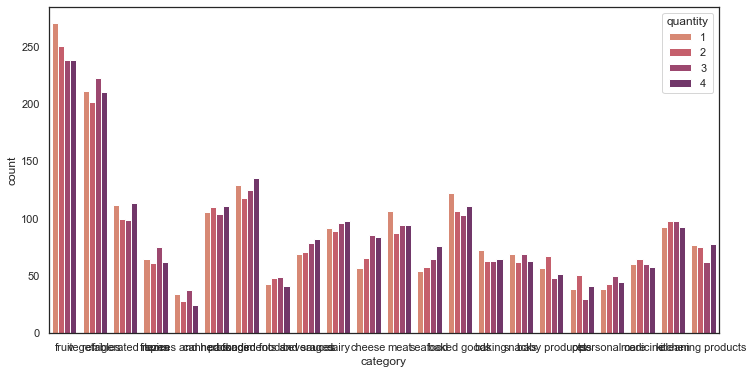

In [43]:
sns.countplot(data=data,x='category',palette='flare',hue='quantity')

*** we can say that fruits and vegetables are sold in most quantities.

<AxesSubplot:xlabel='date_day', ylabel='count'>

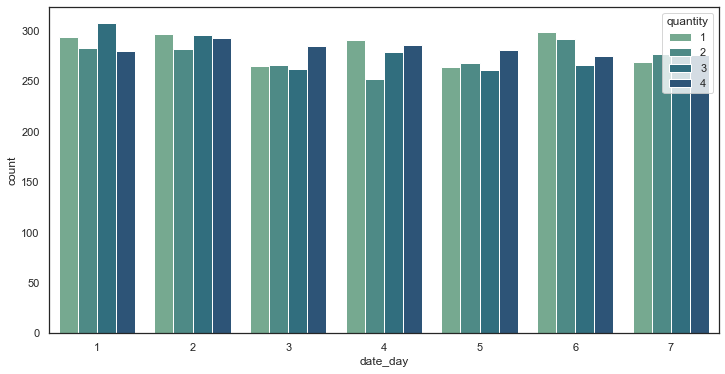

In [42]:
sns.countplot(data=data,x='date_day',palette='crest',hue='quantity')

*** the above visualization denotes that there is hardly any difference in quantity daywise in this month. 

In [27]:
data['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [29]:
data['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

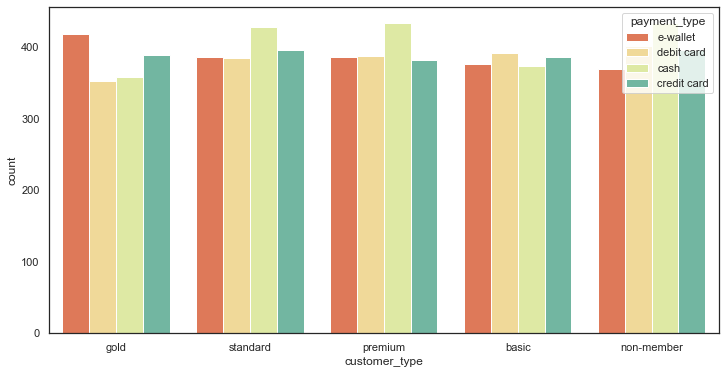

In [45]:
sns.countplot(data=data,x='customer_type',palette='Spectral',hue='payment_type')

*** We observe that Gold customers use e-wallet more than other payment types. whereas standad and premium customers mostly using cash.credit card and debit card are used across all customer types. Overall we can say that all 4 kinds of payment types are used on a great scale across all customer types.

<AxesSubplot:xlabel='quantity', ylabel='count'>

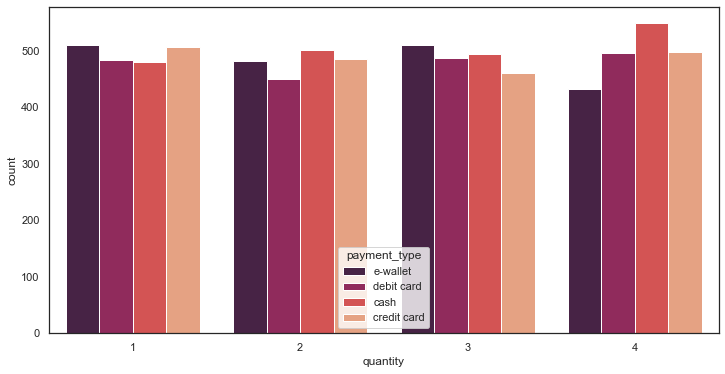

In [46]:
sns.countplot(data=data,x='quantity',palette='rocket',hue='payment_type')

*** The above countplot depicts a relationship between quantity and payment type. so we can see there is not much difference regarding payment type across quantities bought.

In [31]:
data['quantity'].value_counts()

1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64

In [33]:
data['timestamp'].nunique()

7738

### Visualizations of the numerical variables

In [34]:
data.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type',
       'date_year', 'date_month_no', 'date_day'],
      dtype='object')

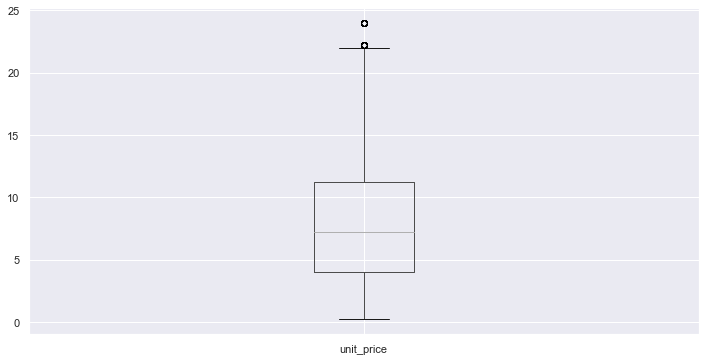

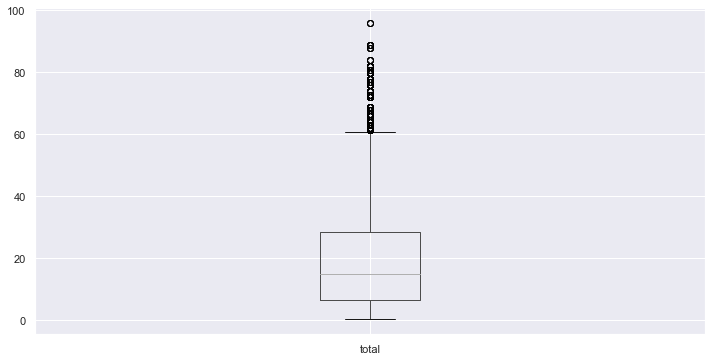

In [35]:
numerical_columns = ['unit_price', 'total']
for column in numerical_columns:
    data.boxplot(column)
    plt.show()

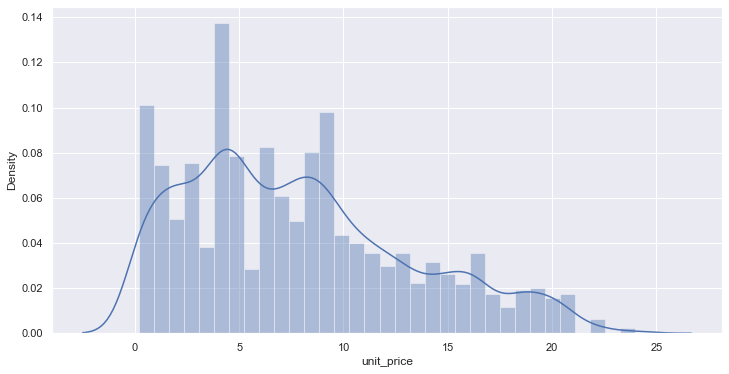

In [36]:
sns.distplot(a=data.unit_price)
plt.show()

*** the above distribution plot that uniot price is not a normally distributed data. the data is positively skewed.

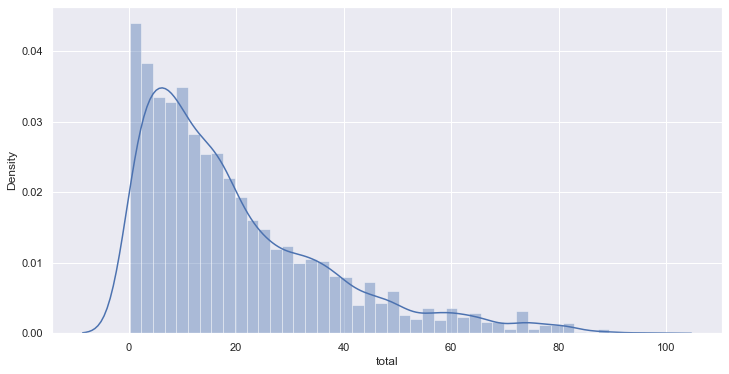

In [37]:
sns.distplot(a=data.total)
plt.show()

*** the above data for total is normally distributed but positively skewed data.

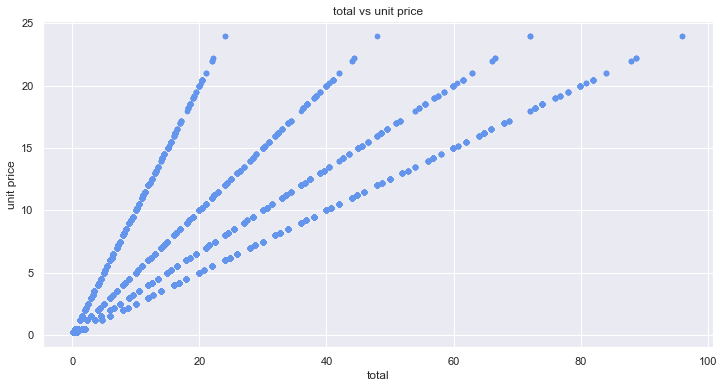

In [38]:
#scatter plot
data.plot(
    x='total', 
    y='unit_price', 
    kind='scatter', 
    c='cornflowerblue',
    title='total vs unit price',
    xlabel='total',
    ylabel='unit price'
)

plt.show()

In [39]:
# Checking correlation
data.corr()

,unit_price,quantity,total,date_year,date_month_no,date_day
unit_price,1.000000,0.024588,0.792018,NaN,NaN,0.026421
quantity,0.024588,1.000000,0.521926,NaN,NaN,-0.002321
total,0.792018,0.521926,1.000000,NaN,NaN,0.016510
date_year,NaN,NaN,NaN,NaN,NaN,NaN
date_month_no,NaN,NaN,NaN,NaN,NaN,NaN
date_day,0.026421,-0.002321,0.016510,NaN,NaN,1.000000


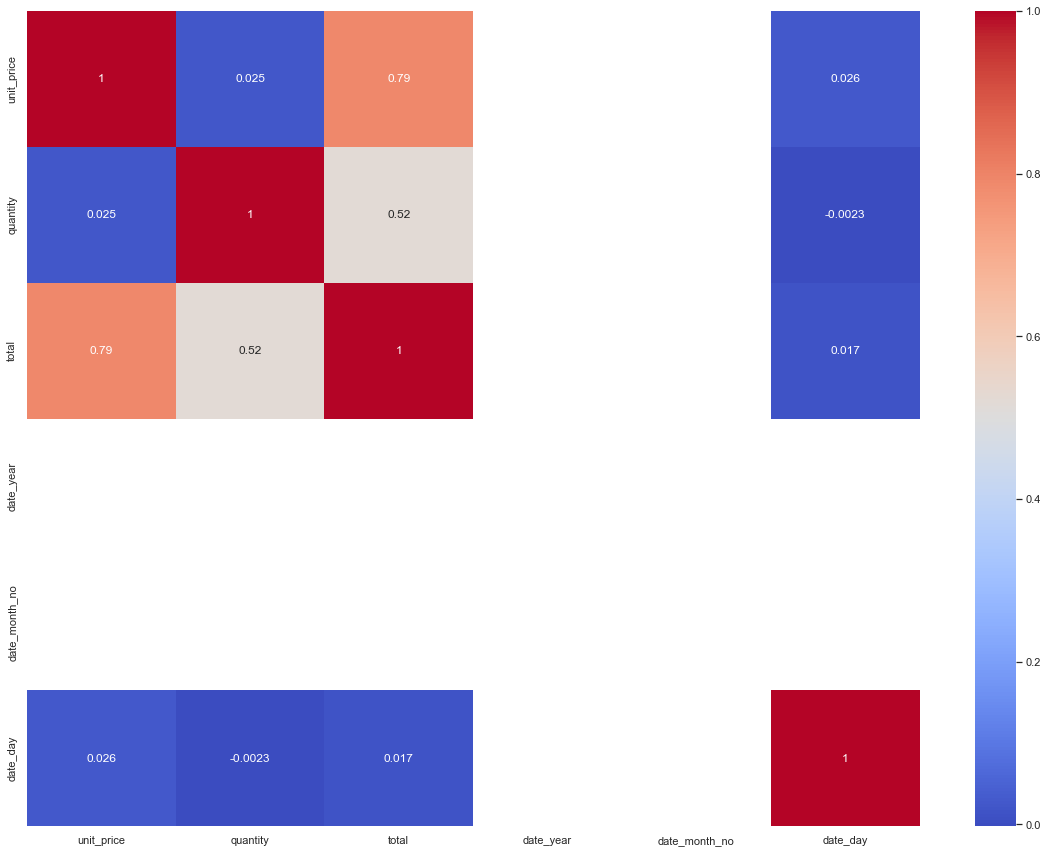

In [40]:
#Heatmap
plt.figure(figsize=(20,15))
sns.set(style="white")
sns.heatmap(data.corr(),annot=True,cmap="coolwarm" )
plt.show()

## Summary

### since we have now completed an initial exploratory data analysis on the sample of data provided, we are clear on the data now. 

#### The main question of the client is "How to better stock the items that they sell"

*** From this dataset, it is impossible to answer that question. Now we have only some vague statistics which in no way reliable as the data sample is from 1 store and 1 week worth of data. In order to make the next step on this project with the client, it is clear that:

***  We need more rows of data.

***  Since the current business problem is too broad, we have to narrow down the focus in order to deliver a valuable end product.

*** We need more features. Based on the problem statement that we move forward with, we need more columns (features) like 'stocks at the begining of the day', 'stocks at the end of the day', 'returned item count(if any) at the end of the day','category-wise self-life', just to name a few, that might help us to address the specific problem and understand the outcome that we're solving for.